In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`Read Data`

In [3]:
data = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/Loyalty_card_customers.csv/Loyalty_card_customers.csv')
data.head()

,Loyalty ID,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2016,NaN,3839.14,Standard
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2016,NaN,3839.61,Standard
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2014,1/8/2018,3839.75,Standard
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2013,NaN,3839.75,Standard
4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2014,NaN,3842.79,Standard


In [4]:
data.columns

Index(['Loyalty ID', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [5]:
data1 = data.drop(data.columns[[1,2,3,7,8,9]],axis = 1)
data1.columns

Index(['Loyalty ID', 'Country', 'Province or State', 'City', 'Gender',
       'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [6]:
data1.duplicated().sum()
#data1[data1.duplicated(keep= False)]

0

`check missing value dalam data`

In [7]:
data1.isna().sum()

Loyalty ID                     0
Country                        3
Province or State              3
City                           3
Gender                         3
Education                      3
Location Code                  3
Income                         3
Marital Status                 3
LoyaltyStatus                  3
EnrollmentDateOpening          3
CancellationDate           14614
Customer Lifetime Value        3
EnrollmentType                 3
dtype: int64

In [8]:
data1.loc[:,data1.isna().any()]

,Country,Province or State,City,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,Canada,Ontario,Toronto,female,Bachelor,Urban,70146.0,Married,Star,2/15/2016,NaN,3839.14,Standard
1,Canada,Alberta,Edmonton,male,College,Rural,0.0,Divorced,Star,3/9/2016,NaN,3839.61,Standard
2,Canada,British Columbia,Vancouver,male,College,Urban,0.0,Single,Star,7/14/2014,1/8/2018,3839.75,Standard
3,Canada,Ontario,Toronto,male,College,Suburban,0.0,Single,Star,2/17/2013,NaN,3839.75,Standard
4,Canada,Quebec,Hull,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2014,NaN,3842.79,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16899,Canada,Quebec,Montreal,male,Bachelor,Urban,58958.0,Married,Star,4/22/2018,12/22/2018,83325.38,2018 Promotion
16900,Canada,Manitoba,Winnipeg,female,Bachelor,Suburban,58958.0,Married,Star,12/3/2015,8/3/2016,83325.38,Standard
16901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data1 = data1.drop(data1[data1['Country'].isna()].index)
data1.isna().sum()

Loyalty ID                     0
Country                        0
Province or State              0
City                           0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value        0
EnrollmentType                 0
dtype: int64

* Terdapat data pembatalan pendaftaran dan data customer yang melanjutkan pendaftaran
* Maka data akan diolah berdasarkan Cust dan NonCust

In [10]:
data_cust = data1[data1['CancellationDate'].isnull()]
data_non_cust = data1[data1['CancellationDate'].notnull()]

`ANALISIS DATA CUSTOMER`

In [11]:
data_cust = data_cust.drop(['Loyalty ID','CancellationDate'],axis = 1)
data_cust.head()

,Country,Province or State,City,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,Customer Lifetime Value,EnrollmentType
0,Canada,Ontario,Toronto,female,Bachelor,Urban,70146.0,Married,Star,2/15/2016,3839.14,Standard
1,Canada,Alberta,Edmonton,male,College,Rural,0.0,Divorced,Star,3/9/2016,3839.61,Standard
3,Canada,Ontario,Toronto,male,College,Suburban,0.0,Single,Star,2/17/2013,3839.75,Standard
4,Canada,Quebec,Hull,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2014,3842.79,Standard
5,Canada,Yukon,Whitehorse,male,Bachelor,Rural,26262.0,Married,Star,5/7/2012,3844.57,Standard


In [12]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14611 entries, 0 to 16898
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  14611 non-null  object 
 1   Province or State        14611 non-null  object 
 2   City                     14611 non-null  object 
 3   Gender                   14611 non-null  object 
 4   Education                14611 non-null  object 
 5   Location Code            14611 non-null  object 
 6   Income                   14611 non-null  float64
 7   Marital Status           14611 non-null  object 
 8   LoyaltyStatus            14611 non-null  object 
 9   EnrollmentDateOpening    14611 non-null  object 
 10  Customer Lifetime Value  14611 non-null  float64
 11  EnrollmentType           14611 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.4+ MB


In [13]:
data_cust.describe(include='object')

,Country,Province or State,City,Gender,Education,Location Code,Marital Status,LoyaltyStatus,EnrollmentDateOpening,EnrollmentType
count,14611,14611,14611,14611,14611,14611,14611,14611,14611,14611
unique,1,11,29,2,5,3,3,3,2446,2
top,Canada,Ontario,Toronto,female,Bachelor,Suburban,Married,Star,4/3/2012,Standard
freq,14611,4708,2926,7311,9148,4978,8489,6740,34,13770


In [14]:
data_cust.describe()

,Income,Customer Lifetime Value
count,14611.000000,14611.000000
mean,37773.523441,7963.998742
std,30351.648309,6789.988536
min,0.000000,1898.010000
25%,0.000000,3965.470000
50%,34317.000000,5780.180000
75%,62433.000000,8933.675000
max,99981.000000,74228.520000


In [15]:
data_cust_num = data_cust.select_dtypes(exclude='object')
data_cust_num.corr()

,Income,Customer Lifetime Value
Income,1.000000,0.020918
Customer Lifetime Value,0.020918,1.000000


`sangat kecil hubungan antara customer lifetime dengan pendapatan`

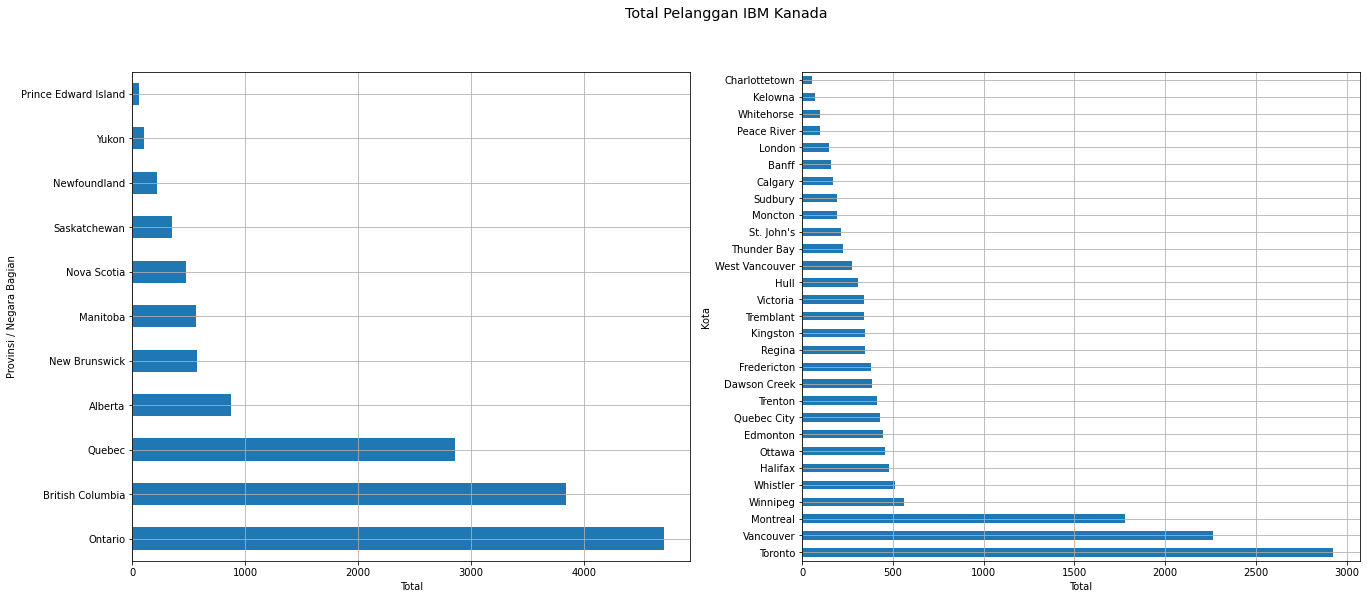

In [16]:
fig = plt.figure(figsize=(22, 9))
st = fig.suptitle("Total Pelanggan IBM Kanada", fontsize="x-large")

plt.subplot(121)
data_cust['Province or State'].value_counts().plot(kind='barh')
plt.xlabel('Total')
plt.ylabel('Provinsi / Negara Bagian')
plt.grid(True)

plt.subplot(122)
data_cust['City'].value_counts().plot(kind='barh')
plt.xlabel('Total')
plt.ylabel('Kota')
plt.grid(True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


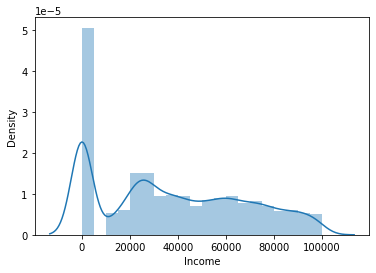

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


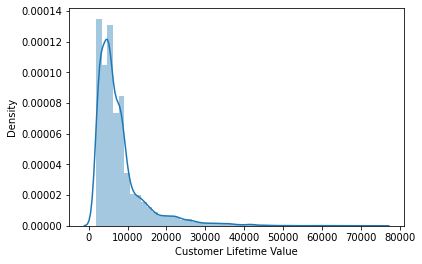

In [17]:
col = data1.select_dtypes(exclude='object')

for i in col:
  sns.distplot(data_cust[i])
  plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

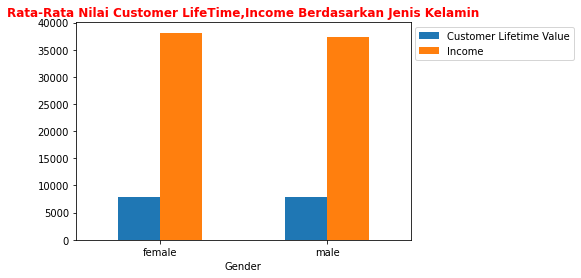

In [18]:
data_cust.groupby(['Gender']).mean()[['Customer Lifetime Value','Income']].plot(kind='bar')
plt.title("Rata-Rata Nilai Customer LifeTime,Income Berdasarkan Jenis Kelamin", color = 'red',fontweight="bold")
plt.legend(loc='upper center',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation='0')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text major ticklabel objects>)

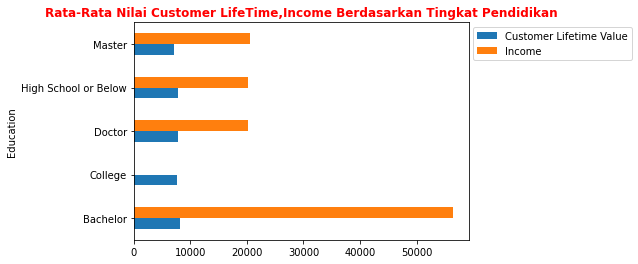

In [19]:
data_cust.groupby(['Education']).mean()[['Customer Lifetime Value','Income']].plot(kind='barh')
plt.title("Rata-Rata Nilai Customer LifeTime,Income Berdasarkan Tingkat Pendidikan", color = 'red',fontweight="bold")
plt.legend(loc='upper center',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation='0')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

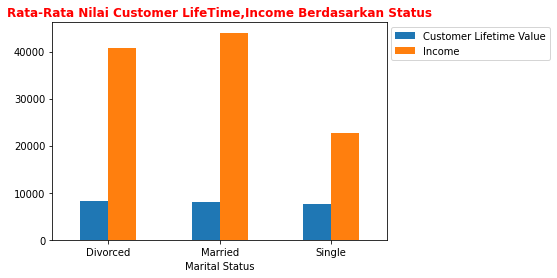

In [20]:
data_cust.groupby(['Marital Status']).mean()[['Customer Lifetime Value','Income']].plot(kind='bar')
plt.title("Rata-Rata Nilai Customer LifeTime,Income Berdasarkan Status", color = 'red',fontweight="bold")
plt.legend(loc='upper center',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation='0')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

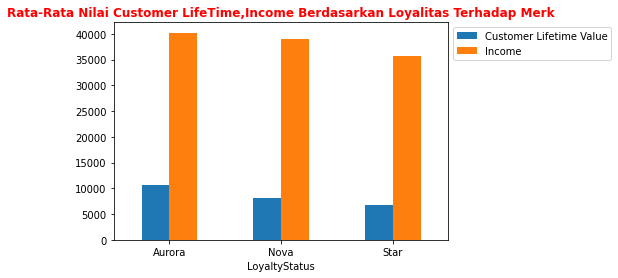

In [21]:
data_cust.groupby(['LoyaltyStatus']).mean()[['Customer Lifetime Value','Income']].plot(kind='bar')
plt.title("Rata-Rata Nilai Customer LifeTime,Income Berdasarkan Loyalitas Terhadap Merk", color = 'red',fontweight="bold")
plt.legend(loc='upper center',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation='0')

Text(0.5, 0, '')

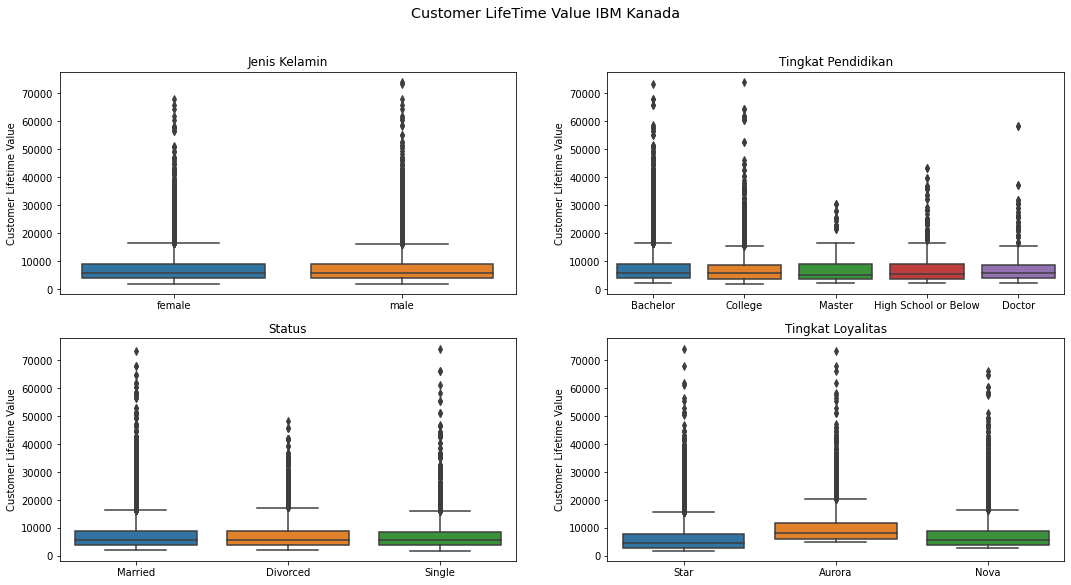

In [22]:
fig = plt.figure(figsize=(18, 9))
st = fig.suptitle("Customer LifeTime Value IBM Kanada", fontsize="x-large")

ax = plt.subplot(221)
sns.boxplot(x= data_cust['Gender'], y= data_cust['Customer Lifetime Value'], data= data_cust,ax=ax)
plt.title('Jenis Kelamin')
plt.xlabel(None)

ax = plt.subplot(222)
sns.boxplot(x= data_cust['Education'], y= data_cust['Customer Lifetime Value'], data= data_cust,ax=ax)
plt.title('Tingkat Pendidikan')
plt.xlabel(None)

ax = plt.subplot(223)
sns.boxplot(x= data_cust['Marital Status'], y= data_cust['Customer Lifetime Value'], data= data_cust,ax=ax)
plt.title('Status')
plt.xlabel(None)

ax = plt.subplot(224)
sns.boxplot(x= data_cust['LoyaltyStatus'], y= data_cust['Customer Lifetime Value'], data= data_cust,ax=ax)
plt.title('Tingkat Loyalitas')
plt.xlabel(None)

Text(0.5, 0, '')

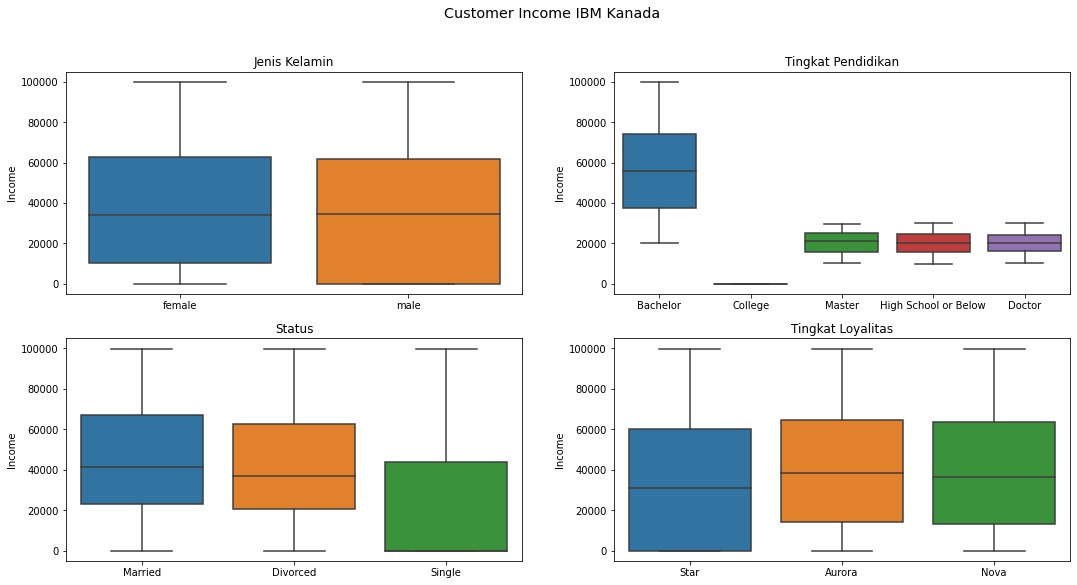

In [23]:
fig = plt.figure(figsize=(18, 9))
st = fig.suptitle("Customer Income IBM Kanada", fontsize="x-large")

ax = plt.subplot(221)
sns.boxplot(x= data_cust['Gender'], y= data_cust['Income'], data= data_cust,ax=ax)
plt.title('Jenis Kelamin')
plt.xlabel(None)

ax = plt.subplot(222)
sns.boxplot(x= data_cust['Education'], y= data_cust['Income'], data= data_cust,ax=ax)
plt.title('Tingkat Pendidikan')
plt.xlabel(None)

ax = plt.subplot(223)
sns.boxplot(x= data_cust['Marital Status'], y= data_cust['Income'], data= data_cust,ax=ax)
plt.title('Status')
plt.xlabel(None)

ax = plt.subplot(224)
sns.boxplot(x= data_cust['LoyaltyStatus'], y= data_cust['Income'], data= data_cust,ax=ax)
plt.title('Tingkat Loyalitas')
plt.xlabel(None)

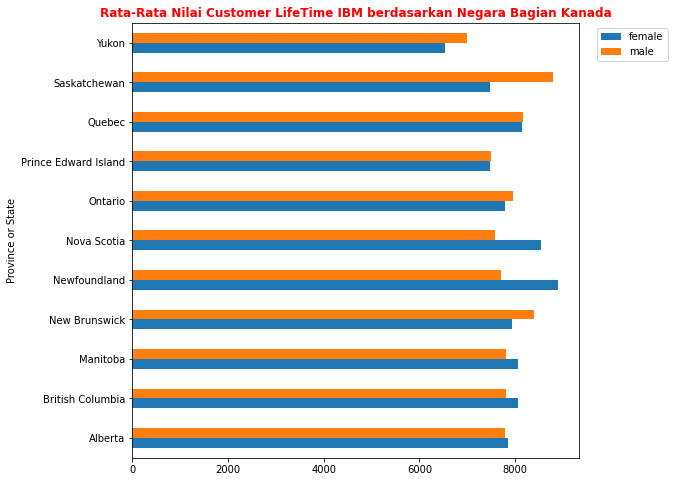

In [24]:
pd.crosstab(data_cust['Province or State'], data_cust['Gender'],values = data_cust['Customer Lifetime Value'],aggfunc = "mean").plot(kind="barh",figsize=(8, 8))
plt.title("Rata-Rata Nilai Customer LifeTime IBM berdasarkan Negara Bagian Kanada", color = 'red',fontweight="bold")
plt.legend(loc='upper center',bbox_to_anchor=(1.12, 1))

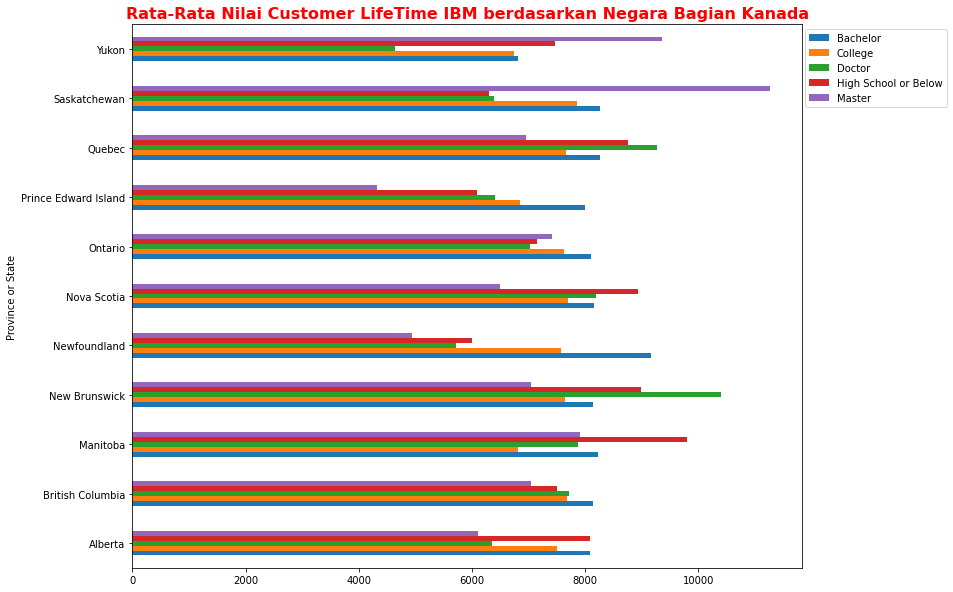

In [25]:
pd.crosstab(data_cust['Province or State'], data_cust['Education'],values = data_cust['Customer Lifetime Value'],aggfunc = "mean").plot(kind="barh",figsize=(12, 10))
plt.title("Rata-Rata Nilai Customer LifeTime IBM berdasarkan Negara Bagian Kanada", color = 'red',fontweight="bold",fontsize=16)
plt.legend(loc='upper center',bbox_to_anchor=(1.11, 1))

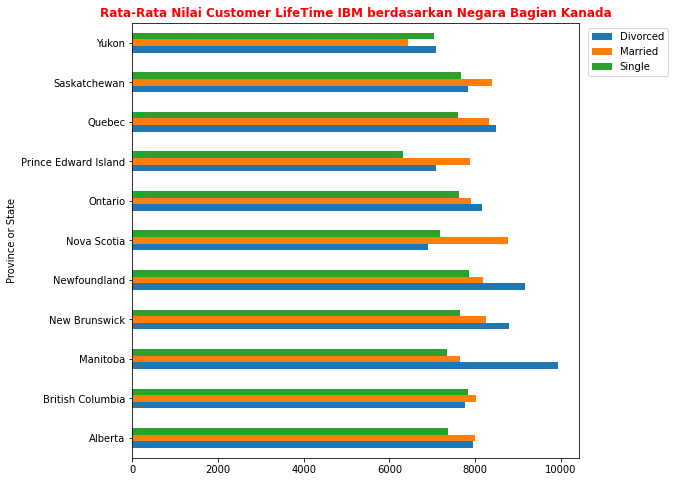

In [26]:
pd.crosstab(data_cust['Province or State'], data_cust['Marital Status'],values = data_cust['Customer Lifetime Value'],aggfunc = "mean").plot(kind="barh",figsize=(8, 8))
plt.title("Rata-Rata Nilai Customer LifeTime IBM berdasarkan Negara Bagian Kanada", color = 'red',fontweight="bold")
plt.legend(loc='upper center',bbox_to_anchor=(1.11, 1))

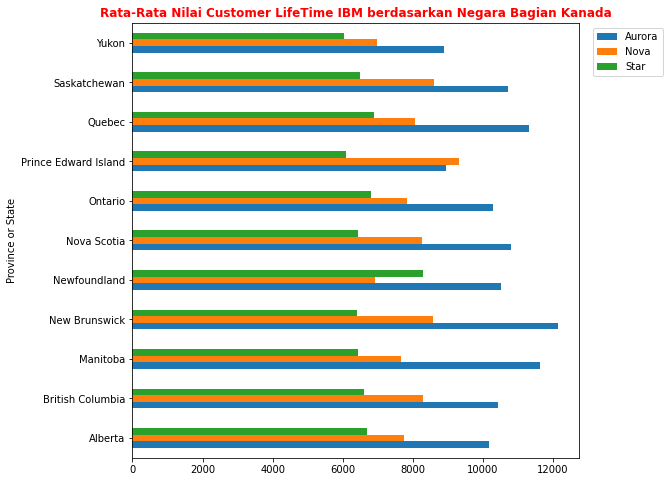

In [27]:
pd.crosstab(data_cust['Province or State'], data_cust['LoyaltyStatus'],values = data_cust['Customer Lifetime Value'],aggfunc = "mean").plot(kind="barh",figsize=(8, 8))
plt.title("Rata-Rata Nilai Customer LifeTime IBM berdasarkan Negara Bagian Kanada", color = 'red',fontweight="bold")
plt.legend(loc='upper center',bbox_to_anchor=(1.11, 1))

In [28]:
data_cust['EnrollmentType'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [29]:
data_cust['EnrollmentType'].replace({'2018 Promotion':'Promotion'},inplace=True)

In [30]:
data_cust['EnrollmentType'].value_counts()

Standard     13770
Promotion      841
Name: EnrollmentType, dtype: int64

Text(0.5, 0, '')

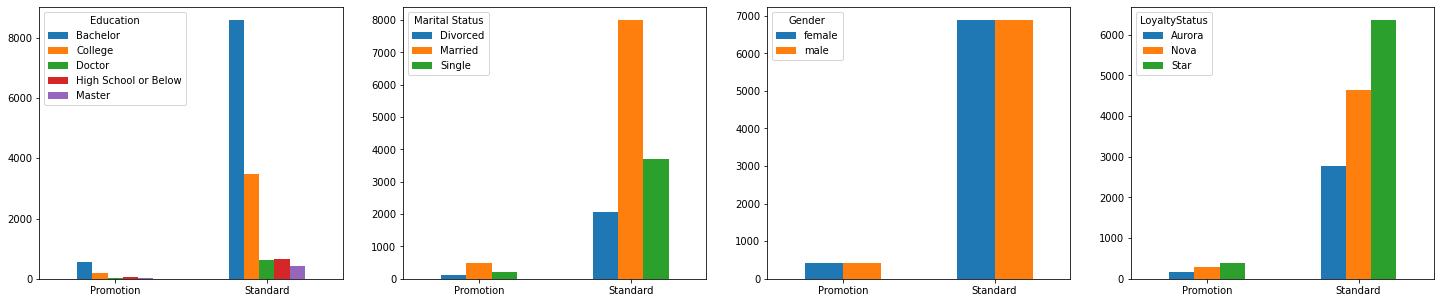

In [31]:
plt.figure(figsize=(25,5))

ax = plt.subplot(141)
pd.crosstab(data_cust['EnrollmentType'], data_cust['Education']).plot(kind="bar",ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(142)
pd.crosstab(data_cust['EnrollmentType'], data_cust['Marital Status']).plot(kind="bar",ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(143)
pd.crosstab(data_cust['EnrollmentType'], data_cust['Gender']).plot(kind="bar",ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

ax = plt.subplot(144)
pd.crosstab(data_cust['EnrollmentType'], data_cust['LoyaltyStatus']).plot(kind="bar",ax=ax)
plt.xticks(rotation='0')
plt.xlabel(None)

**ANALISIS DATA NON CUSTOMER** -----|Perbandingan|

In [32]:
data_non_cust.head()

,Loyalty ID,Country,Province or State,City,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
2,429460,Canada,British Columbia,Vancouver,male,College,Urban,0.0,Single,Star,7/14/2014,1/8/2018,3839.75,Standard
19,354730,Canada,New Brunswick,Fredericton,female,College,Urban,0.0,Married,Star,10/23/2014,1/2/2018,3885.46,Standard
31,201574,Canada,Ontario,Ottawa,female,Bachelor,Suburban,26605.0,Married,Star,4/6/2015,12/6/2015,3893.31,Standard
39,834891,Canada,British Columbia,Vancouver,female,Bachelor,Rural,30821.0,Married,Star,3/8/2017,4/18/2017,3911.12,Standard
45,733338,Canada,Ontario,Thunder Bay,female,Bachelor,Rural,66676.0,Married,Star,6/3/2016,2/3/2017,3919.37,Standard


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Data Non Customer')

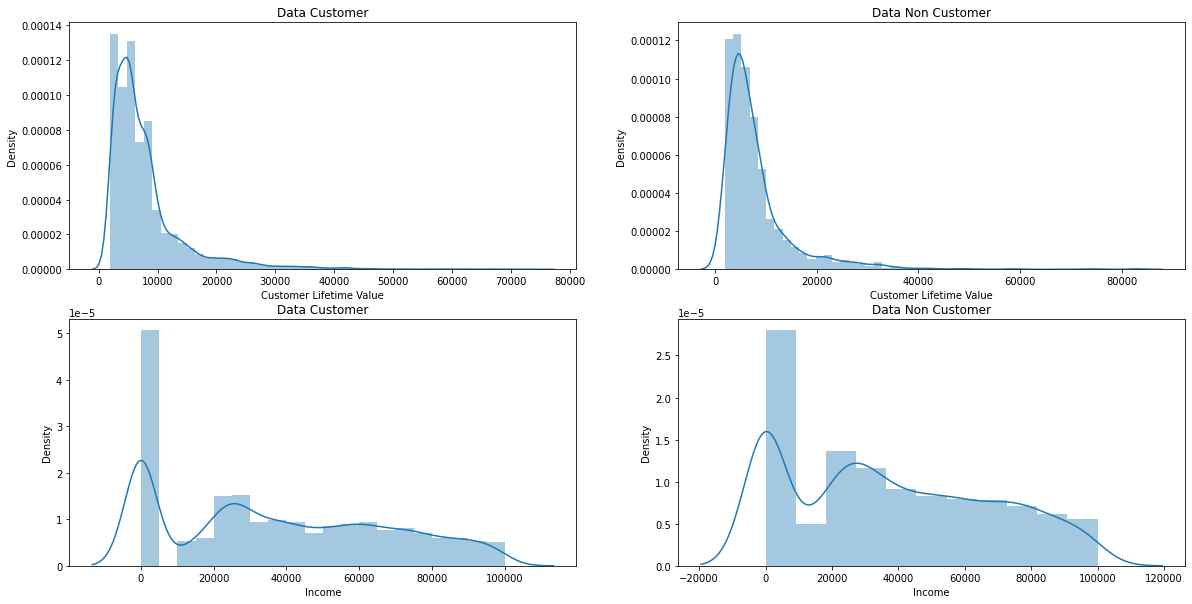

In [50]:
plt.figure(figsize=(20,10))

ax = plt.subplot(221)
sns.distplot(data_cust['Customer Lifetime Value'],ax=ax)
plt.title('Data Customer')

ax = plt.subplot(222)
sns.distplot(data_non_cust['Customer Lifetime Value'],ax=ax)
plt.title('Data Non Customer')

ax = plt.subplot(223)
sns.distplot(data_cust['Income'],ax=ax)
plt.title('Data Customer')

ax = plt.subplot(224)
sns.distplot(data_non_cust['Income'],ax=ax)
plt.title('Data Non Customer')

**ANALISIS DATA NON CUSTOMER** -----|Enroll,Cancel|

In [59]:
data_non_cust['EnrollmentDateOpening'] = pd.to_datetime(data_non_cust['EnrollmentDateOpening'])
data_non_cust['CancellationDate'] = pd.to_datetime(data_non_cust['CancellationDate'])

data_non_cust['EnrollmentDateOpening'] = data_non_cust['EnrollmentDateOpening'].astype('datetime64[ns]')
data_non_cust['CancellationDate'] = data_non_cust['CancellationDate'].astype('datetime64[ns]')
data_non_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290 entries, 2 to 16900
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Loyalty ID               2290 non-null   object        
 1   Country                  2290 non-null   object        
 2   Province or State        2290 non-null   object        
 3   City                     2290 non-null   object        
 4   Gender                   2290 non-null   object        
 5   Education                2290 non-null   object        
 6   Location Code            2290 non-null   object        
 7   Income                   2290 non-null   float64       
 8   Marital Status           2290 non-null   object        
 9   LoyaltyStatus            2290 non-null   object        
 10  EnrollmentDateOpening    2290 non-null   datetime64[ns]
 11  CancellationDate         2290 non-null   datetime64[ns]
 12  Customer Lifetime Value  2290 non

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [61]:
data_non_cust['diff_day'] = data_non_cust['CancellationDate'] - data_non_cust['EnrollmentDateOpening']
data_non_cust['diff_day'] = data_non_cust['diff_day'].dt.days.astype('int16')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
data_non_cust['diff_day'].dtypes

dtype('int16')

In [69]:
data_non_cust[data_non_cust.diff_day < 0].count()

Loyalty ID                 21
Country                    21
Province or State          21
City                       21
Gender                     21
Education                  21
Location Code              21
Income                     21
Marital Status             21
LoyaltyStatus              21
EnrollmentDateOpening      21
CancellationDate           21
Customer Lifetime Value    21
EnrollmentType             21
diff_day                   21
dtype: int64

`terdapat 19 konsumen yang kembali melakukan pendaftaran dikarenakan promosi 2018`

In [72]:
data_non_cust.drop(data_non_cust[data_non_cust.diff_day < 0].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


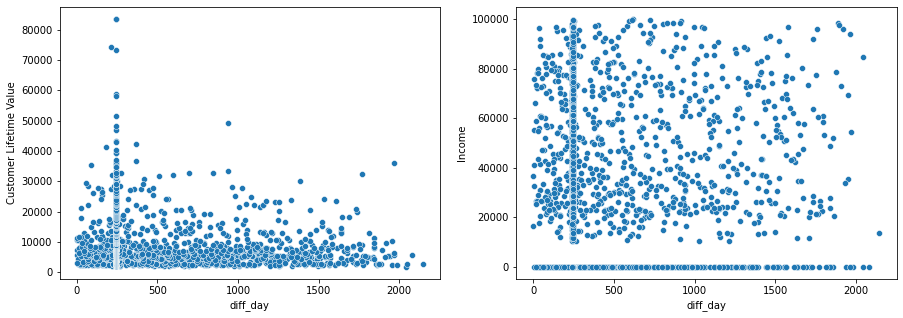

In [88]:
fig = plt.figure(figsize=(15, 5))

ax = plt.subplot(121)
sns.scatterplot(data_non_cust['diff_day'],data_non_cust['Customer Lifetime Value'],ax=ax)

ax = plt.subplot(122)
sns.scatterplot(data_non_cust['diff_day'],data_non_cust['Income'],ax=ax)

In [85]:
data_non_cust['diff_day'].mode()[0]

243

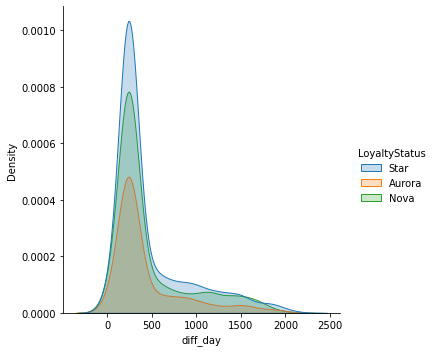

In [90]:
sns.displot(data=data_non_cust, x='diff_day', hue='Marital Status', kind='kde', fill=True)

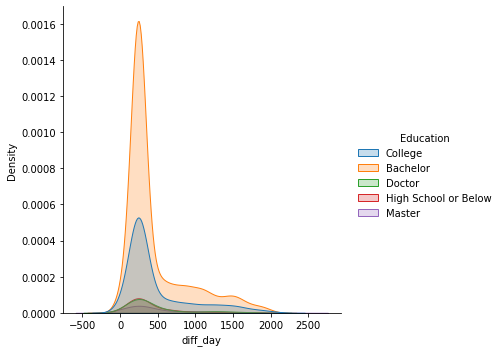

In [83]:
sns.displot(data=data_non_cust, x='diff_day', hue='Education', kind='kde', fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


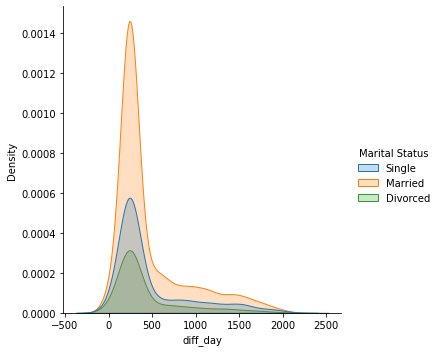

In [92]:
sns.displot(data=data_non_cust, x='diff_day', hue='Marital Status', kind='kde', fill=True,ax=ax)